Final parameters (w):
[ 0.98237614 -0.3810853   0.87239048  0.87259493  0.88052961  0.99237953
  0.88603624  0.91310902  0.96110241]
Initial cost:  23.027020658379545
Final cost: 1.9358719488243605


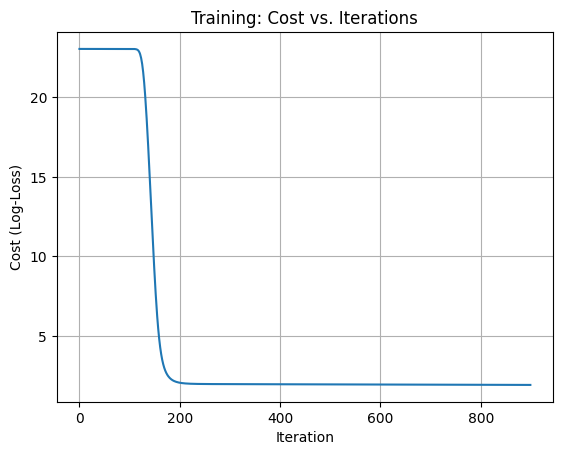

Plotting cost sensitivity for parameter indices: [1 2 3 4 5 6 7 8]


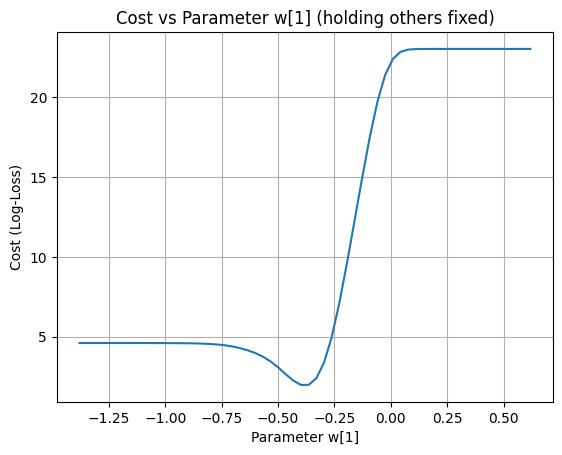

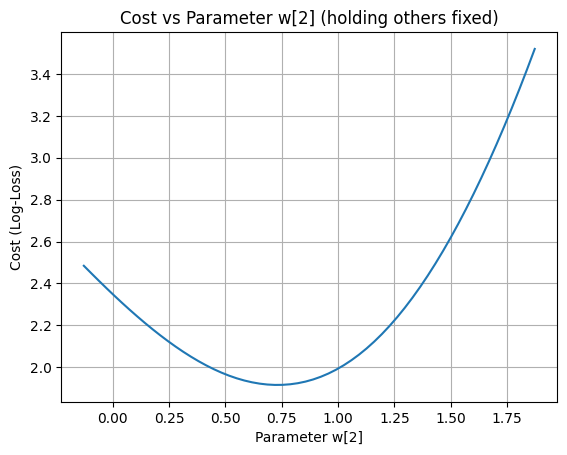

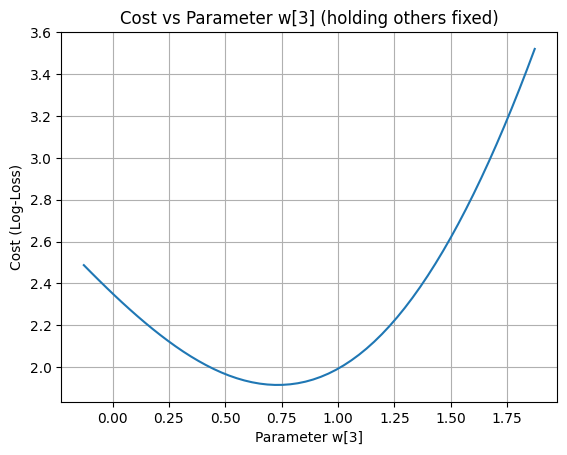

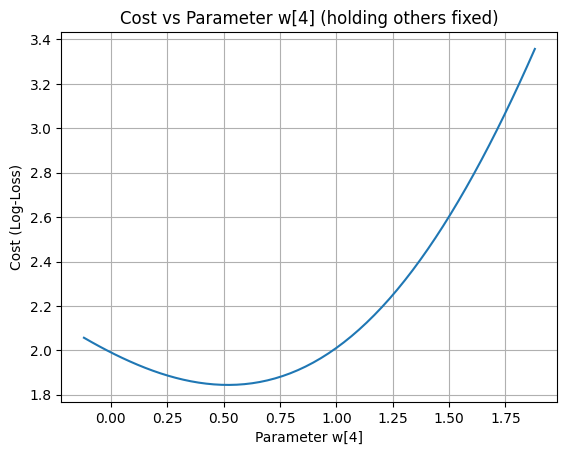

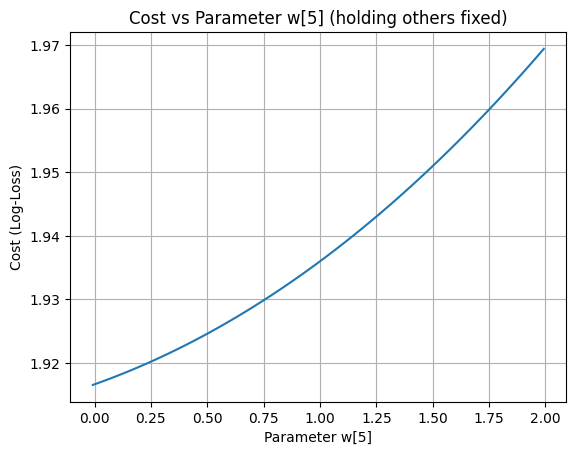

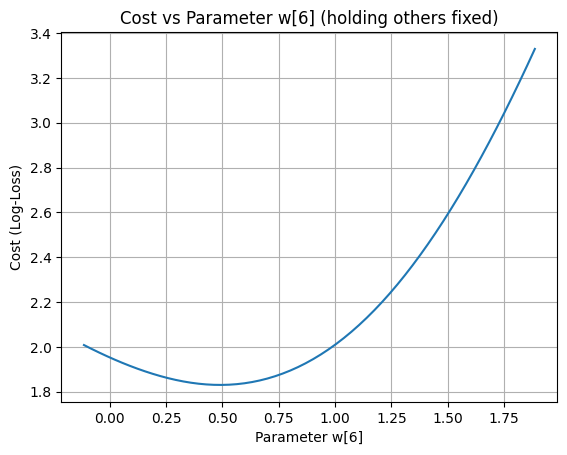

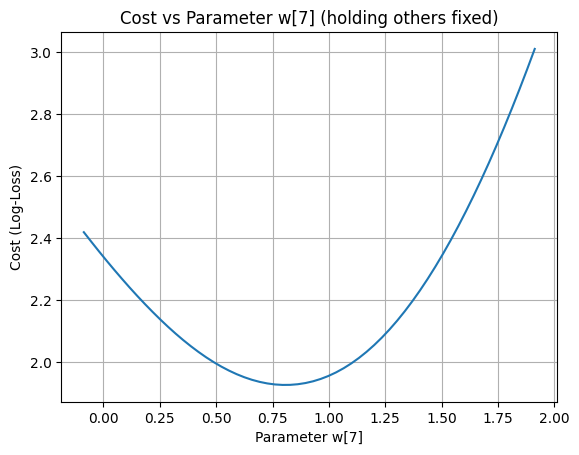

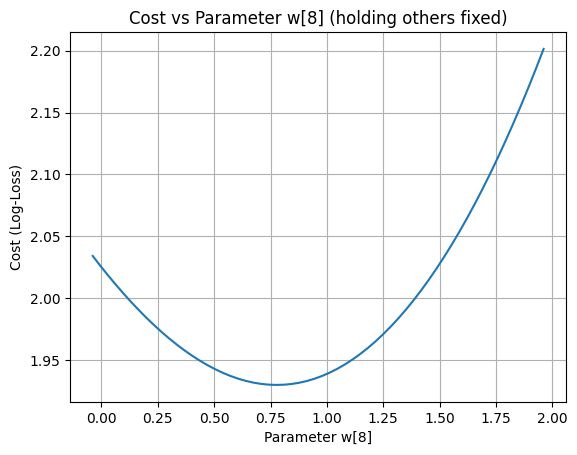

Test loss: 1.9626921393696406
Test accuracy: 0.714


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


# 1) Load / prepare data
# --------------------------------------------------
# Assumptions (edit as needed):
#   - Binary classification with labels in {0,1}
#   - X is an (m, n) feature matrix (no bias column yet)
#   - y is an (m,) label vector

# TODO: replace with your real data loading
# def load_data_X():
#     # EXAMPLE PLACEHOLDER — REPLACE with file read:
#     df = pd.read_csv("CollegePlacement.csv")
#     df["Internship_Experience"] = df["Internship_Experience"].map({"Yes": 1, "No": 0})
#     selected_cols = ["IQ", "Prev_Sem_Result", "CGPA", "Academic_Performance", "Internship_Experience", "Extra_Curricular_Score", "Communication_Skills", "Projects_Completed"]

#     df_selected_columns = df[selected_cols]

#     X = df_selected_columns.to_numpy()

#     return X
# def load_data_Y():
#     # EXAMPLE PLACEHOLDER — REPLACE with file read:
#     df = pd.read_csv("CollegePlacement.csv")

#     df["Placement"] = df["Placement"].map({"Yes": 1, "No": 0})
#     y = df["Placement"]
#     return y


df = pd.read_csv("CollegePlacement.csv")
df["Internship_Experience"] = df["Internship_Experience"].map({"Yes": 1, "No": 0})
selected_cols = ["IQ", "Prev_Sem_Result", "CGPA", "Academic_Performance", "Internship_Experience", "Extra_Curricular_Score", "Communication_Skills", "Projects_Completed"]

df_selected_columns = df[selected_cols]

X = df_selected_columns

df["Placement"] = df["Placement"].map({"Yes": 1, "No": 0})
y = df["Placement"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

m = X_train.shape[1]

X_train = np.column_stack([np.ones(X_train.shape[0]), X_train])
X_test = np.column_stack([np.ones(X_test.shape[0]), X_test])

# Convert y to numpy (optional, usually already is)
y_train = np.array(y_train)
y_test = np.array(y_test)

n_with_bias = X_train.shape[1]

def sigmoid(z):
    # σ(z) = 1 / (1 + e^-z)
    sigmoid = 1/(1 + np.exp(-z))
    return sigmoid
    # TODO: Complete the sigmoid function

def predict_proba(X, w):
    # p = σ(Xw)
    return sigmoid(np.dot(X,w))
    # TODO: Complete the predict probability function

def binary_cross_entropy(y_true, y_prob, eps=1e-12):
    # Log-loss = - [ y log(p) + (1-y) log(1-p) ]
    # You might need to restrict the values using np.clip
    # TODO: Complete the binary cross entropy function
    y_prob = np.clip(y_prob, eps, 1 - eps)
    log_loss = -1 * ((y_true * np.log(y_prob)) + (1-y_true) * np.log(1-y_prob))
    return np.mean(log_loss)

def gradient(X, y_true, y_prob):
    # ∂J/∂w = (1/m) X^T (p - y)
    # TODO: Complete the gradient descent function
    m = X.shape[0]
    return X.T @ (y_prob - y_true) / m

# 3) Initialize parameters
# --------------------------------------------------
# TODO: set the initial values for the parameters

w = np.ones(n_with_bias)


# 4) Hyperparameters
# --------------------------------------------------
# TODO: set learning_rate and num_iterations
learning_rate = 0.0001
num_iterations = 900

# For tracking
cost_history = []


# 5) Gradient Descent loop
# --------------------------------------------------

    # TODO: Forward pass: compute probabilities

    # TODO: Compute loss (log-loss / cross-entropy)

    # TODO: Backward pass: compute gradient

    # TODO Parameter update

for i in range(num_iterations):
    p = predict_proba(X_train, w)                  # forward
    loss = binary_cross_entropy(y_train, p)        # loss
    grad = gradient(X_train, y_train, p)                 # gradient
    w -= learning_rate * grad                # update
    cost_history.append(loss)

print("Final parameters (w):")
print(w)  # w[0] is bias term
print("Initial cost: ", cost_history[0])
print("Final cost:" , cost_history[len(cost_history)-1])

# 6) Final parameters
# # --------------------------------------------------
# print("Final parameters (w):")
# print(w)  # w[0] is bias term

# 7) Plot: Cost vs Iterations
# --------------------------------------------------
plt.figure()
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost (Log-Loss)")
plt.title("Training: Cost vs. Iterations")
plt.grid(True)
plt.show()


# 8) Plot: Cost vs 3 of the most important parameters
# --------------------------------------------------
# Idea: pick 3 parameters (excluding bias) by magnitude after training,
# then sweep each parameter around its learned value while holding others fixed,
# and plot the (1D) cost curve for each.
#At the end of training, you have a weight vector w (parameters). You also have a
# cost function 𝐽 ( 𝑤)
#J(w), which tells you how good or bad those weights are.

#Normally, we look at cost vs iterations (how the loss decreases over time). But sometimes it’s useful to see:
# “What happens to the cost if I wiggle just one parameter, while keeping all others fixed?”

# That’s what the sweep does.
#For each candidate value in the sweep, we create a temporary weight vector w_tmp.
# We replace the chosen parameter with val.
# Then we compute the cost 𝐽 (𝑤_tmp ) using the same dataset.
# Append that cost to a list.

#We plot:

#x-axis: the parameter’s value (from the sweep)

#y-axis: the cost computed at that parameter value

#This shows the “sensitivity curve” of the cost with respect to that parameter.

# Identify top-3 parameters by |w| (excluding bias at index 0)

param_indices = np.arange(1, len(w))  # shift by 1 to skip bias
print("Plotting cost sensitivity for parameter indices:", param_indices)

def compute_cost_given_w(mod_w):
    # Helper to compute cost for a modified parameter vector
    y_hat_mod = predict_proba(X_train, mod_w)
    return binary_cross_entropy(y_train, y_hat_mod)

# For each chosen parameter, sweep values and compute cost
for idx in param_indices:
    center = w[idx]
    #  choose a sensible sweep range; here: ±1.0 around the trained value
    sweep = np.linspace(center - 1.0, center + 1.0, 60)

    costs = []
    for val in sweep:
        w_tmp = w.copy()
        w_tmp[idx] = val
        costs.append(compute_cost_given_w(w_tmp))

    plt.figure()
    plt.plot(sweep, costs)
    plt.xlabel(f"Parameter w[{idx}]")
    plt.ylabel("Cost (Log-Loss)")
    plt.title(f"Cost vs Parameter w[{idx}] (holding others fixed)")
    plt.grid(True)
    plt.show()


# 9) (Optional) Inference helper
# --------------------------------------------------
def predict_label(X_new, w, threshold=0.5):
    # Returns 0/1 predictions based on threshold
    return (predict_proba(X_new, w) >= threshold).astype(int)


p_test = predict_proba(X_test, w)
test_loss = binary_cross_entropy(y_test, p_test)

predictions = (p_test >= 0.5).astype(int)
accuracy = (predictions == y_test).mean()
print("Test loss:", test_loss)
print("Test accuracy:", accuracy)


